# Diabetes Prediction Project

**Student Name:** Saniya Shaikh 
**Project Title:** Diabetes Prediction  

---

## Project Overview
The goal of this project is to predict whether a patient has diabetes (`Outcome`) based on medical attributes such as glucose level, BMI, age, insulin level, and blood pressure.

### Why This Project?
- Helps in early detection of diabetes.
- Supports healthcare professionals in decision-making.
- Provides hands-on experience with classification modeling.

### Steps in this Project:
1. Business Understanding  
2. Data Understanding  
3. Data Preparation  
4. Data Preprocessing  
5. Exploratory Data Analysis (EDA)  
6. Model Selection and Training  
7. Predictions and Evaluation  
8. Feature Importance Analysis


## 1. Import Libraries

We import libraries for:

- **Data manipulation**: pandas, numpy  
- **Visualization**: matplotlib, seaborn  
- **Machine learning**: sklearn (Logistic Regression, Random Forest, preprocessing, metrics)


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt


## 2. Load Dataset

We load the dataset into Python and inspect the first few rows to understand:

- Columns and types  
- Sample data values  
- Initial observations about missing data


In [2]:
# Step 2: Load diabetes dataset from Kaggle
df = pd.read_csv('/kaggle/input/datasets/organizations/uciml/pima-indians-diabetes-database/diabetes.csv')

# Show the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Data Overview

Check dataset shape, data types, and summary statistics to understand:

- Number of rows and columns  
- Numeric feature distributions  
- Basic statistics (mean, min, max, std)


In [3]:
# Step 3: Inspect basic information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:

df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## 4. Data Visualization (Exploratory Data Analysis - EDA)

Data visualization helps us understand:

- Distribution of important medical features  
- Relationship between features and diabetes outcome  
- Class balance in the dataset  
- Detection of outliers  

Visual analysis provides insights before applying machine learning models.


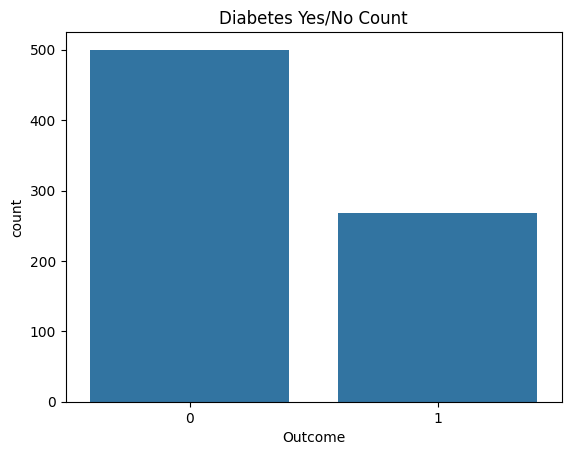

In [6]:
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Yes/No Count')
plt.show()


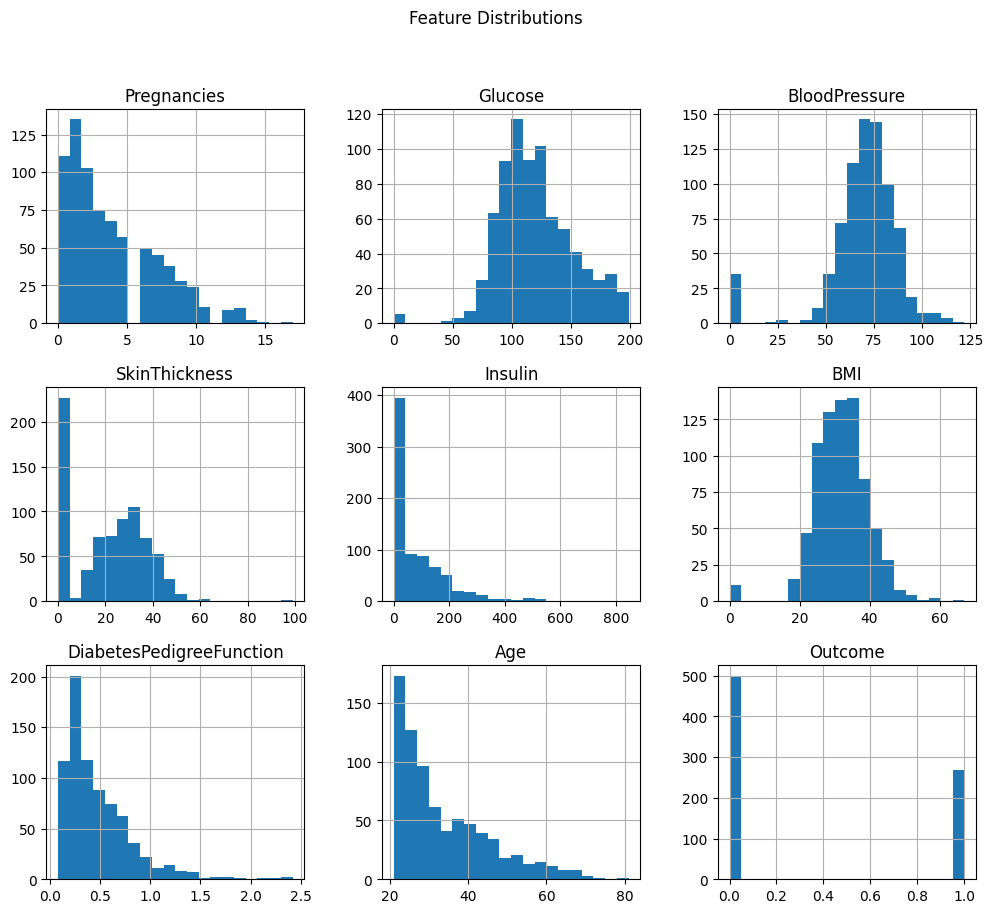

In [7]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


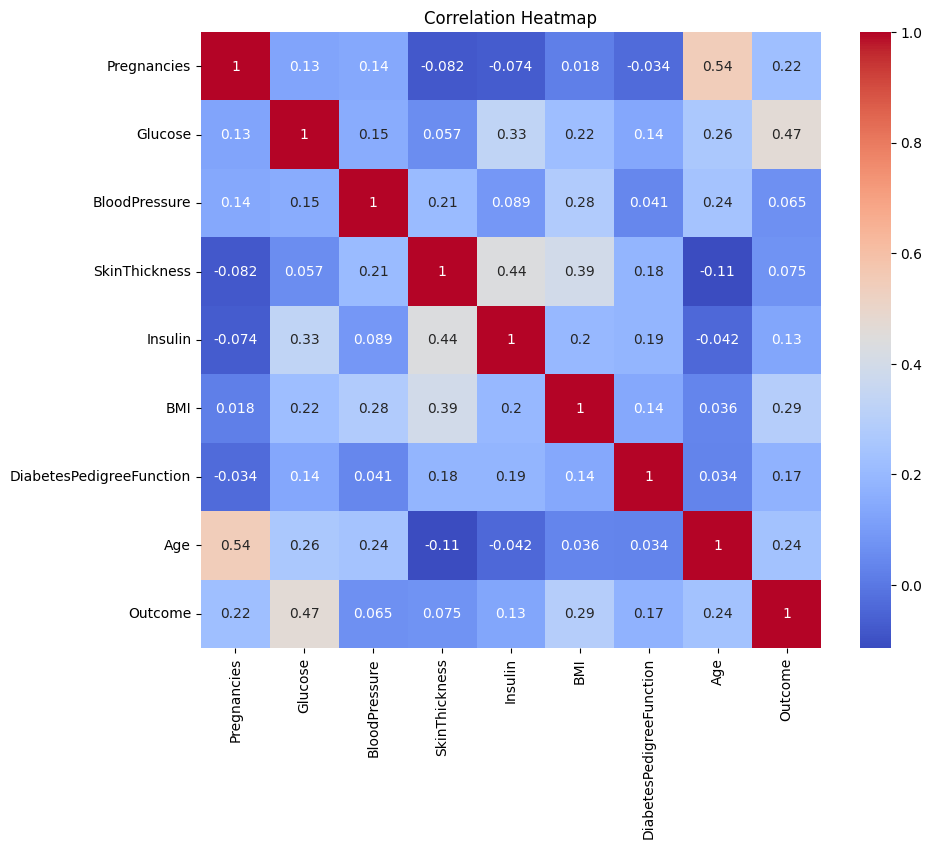

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 5. Handle Missing Values

- Replace zero values with NaN (for selected columns)
- Fill missing values using median


In [9]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())


## 6. Feature and Target Selection

- **Target variable:** `Outcome`  
- **Features:** All remaining columns  

Split dataset into training and testing sets.


In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 7. Feature Scaling

We use StandardScaler to normalize feature values:

- Improves performance for Logistic Regression  
- Ensures features have similar scale


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 8. Model 1: Logistic Regression

Logistic Regression is used as a baseline classification model.

Evaluation Metrics:
- Accuracy
- Confusion Matrix
- Classification Report


In [13]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [14]:
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)


Logistic Regression Accuracy: 0.7445887445887446
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



## 9. Model: K-Nearest Neighbors (KNN)

KNN is a distance-based classification algorithm.

How it works:
- Stores all training data
- Finds the K closest data points to a new sample
- Assigns the majority class among neighbors


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

## 10. Prediction Example




In [16]:
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)


KNN Accuracy: 0.7186147186147186
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



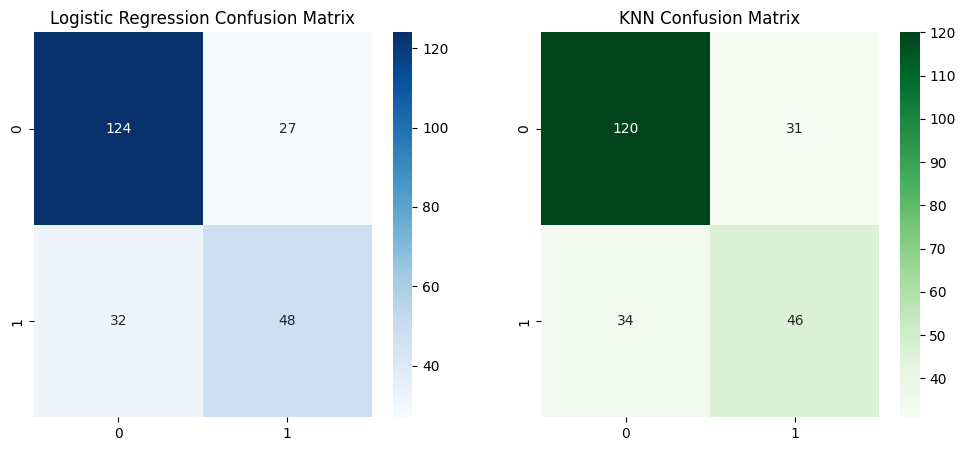

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("KNN Confusion Matrix")

plt.show()


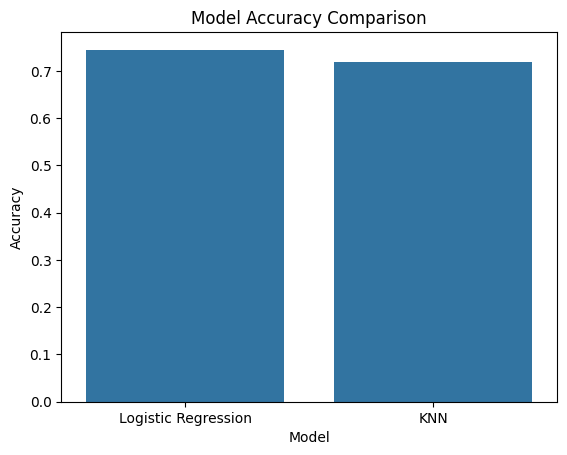

In [18]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn)]
})

sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy Comparison')
plt.show()
